*   Modelagem e Simulação - Inferência Estatística (Teorema Central do Limite)

*   Felipe Daniel Dias dos Santos - 11711ECP004

*   Graduação em Engenharia de Computação - Faculdade de Engenharia Elétrica - Universidade Federal de Uberlândia

Uma amostra aleatória simples de tamanho n da variável aleatória X, com uma dada distribuição de probabilidades, é o conjunto de variáveis aleatórias independentes $X_1,X_2, \ldots, X_n$, cada uma com a mesma distribuição de $X$.

Podemos gerar amostras aleatórias a partir de uma população com uma dada distribuição de probabilidade. Vamos supor que a população segue uma distribuição normal com média $\mu$ e desvio padrão $\sigma$. Gerando $n$ amostras de tamanho $m$:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

mu = 0
sigma = 1
n = 3
m = 4

for i in range(0, n):
  
  X = np.random.normal(mu, sigma, m)
  print('Amostra', i, ':', X)

Amostra 0 : [ 1.28457032 -0.62007834 -1.12716405  0.76501998]
Amostra 1 : [-1.01808564 -0.02145031  1.4940442   0.35774646]
Amostra 2 : [-0.6237747   1.6618513  -0.97683917 -1.02516961]


Teorema: Seja $X$ uma variável aleatória com esperança $E[X] = \mu$ e variância $V(X) = \sigma^2$. Seja $\bar{X}$ a média amostral de uma amostra de tamanho $n$. Então:$$
E[\bar{X}]= \mu, \quad V(\bar{X})=\frac{\sigma^2}{n}.
$$

Vamos verificar esse teorema através de simulações:

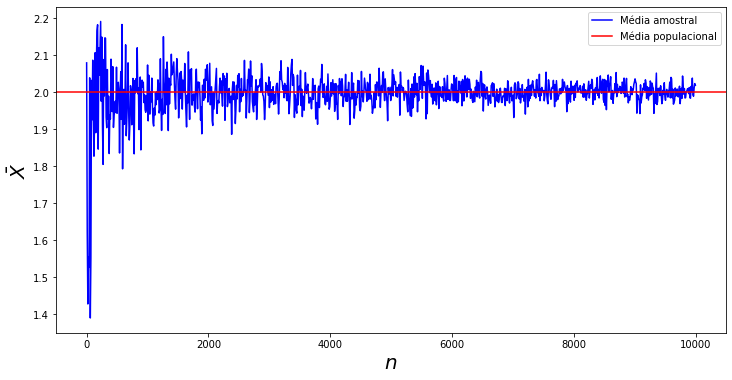

In [ ]:
vn = []
vmean = []
mu = 2
std = 1

for n in np.arange(1, 10000, 10):
  
  X = np.random.exponential(mu, n)
  vmean.append(np.mean(X))
  vn.append(n)

plt.figure(figsize = (12, 6))
plt.plot(vn, vmean, '-', color = 'blue', label = 'Média amostral')
plt.axhline(y = mu, color = 'r', linestyle = '-', label = 'Média populacional')
plt.xlabel(r'$n$', fontsize = 20)
plt.ylabel(r'$\bar{X}$', fontsize = 20)
plt.legend()
plt.show(True)

Teorema: Seja uma amostra aleatória $(X_1,X_2,\ldots,X_n)$ retiradas de uma população com média $\mu$ e variância $\sigma$. A distribuição amostral de $\bar{X}$ aproxima-se, para n grande, de uma distribuição normal com média $E[\bar{X}]=\mu$ e variância $\sigma^2/n$.

Vamos verificar esse teorema através de simulações:

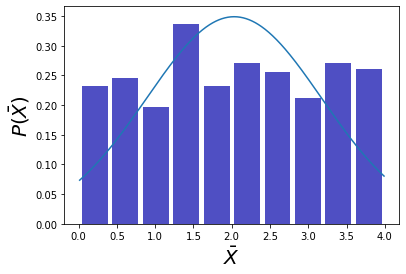

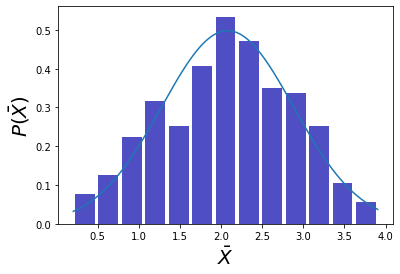

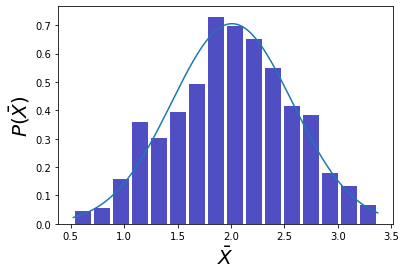

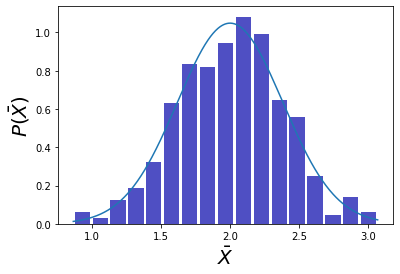

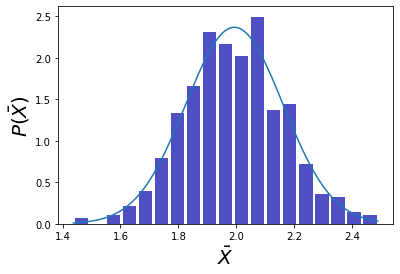

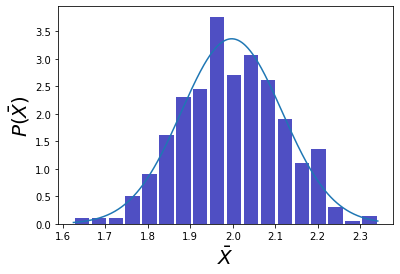

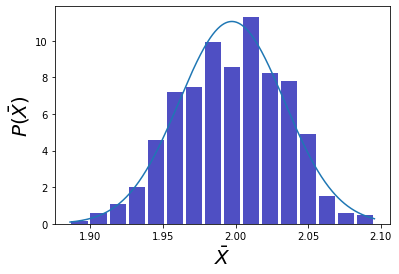

In [ ]:
vS =  [1, 2 , 4 , 8, 50, 100, 1000]
S = 500
mu = 2

for n in vS:
  
  vmean = []
  
  for s in range(0, S):
    
    X = np.random.uniform(0, 2 * mu, n)
    vmean.append(np.mean(X))

  plt.figure(figsize = (6, 4))
  plt.hist(x = vmean, bins = 'auto', color = '#0504aa', alpha = 0.7, rwidth = 0.85, density = True)
  plt.xlabel(r'$\bar{X}$', fontsize = 20)
  plt.ylabel(r'$P(\bar{X})$', fontsize = 20)
  
  xmin, xmax = min(vmean), max(vmean)  
  lnspc = np.linspace(xmin, xmax, len(vmean))
  m, s = stats.norm.fit(vmean)  
  pdf_g = stats.norm.pdf(lnspc, m, s)  
  plt.plot(lnspc, pdf_g, label = "Norm")

plt.show(True)

Exemplo: Seja a variável aleatória com distribuição de probabilidade: P(X = 3) = 0,4; P(X = 6) = 0,3; P(X = 8) = 0,3. Uma amostra com 40 observações é sorteada. Qual é a probabilidade de que a média amostral ser maior do que 5?

A média e o desvio padrão dessa população são dadas abaixo:

In [ ]:
X = [3, 6, 8]
P = [0.4, 0.3, 0.3]
E = 0
E2 = 0

for i in range(0, len(X)):
  
  E += X[i] * P[i]
  E2 += (X[i] ** 2) * P[i]

V = E2 - E ** 2
print("Esperança:", E, "Variância:", V)

Esperança: 5.4 Variância: 4.439999999999991


Vamos sortear várias amostras de tamanho n = 40 e verificar qual a probabilidade da média dessa amostra ser maior do que 5:

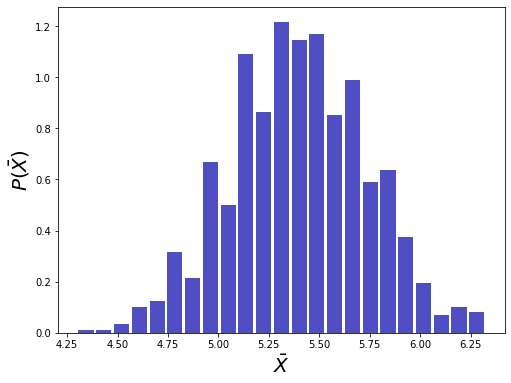

Média das amostras: 5.397399999999999 Média da população: 5.4


In [ ]:
n = 40
ns = 1000
vx = []

for s in range(0, ns):
  
  A = np.random.choice(X, n, p = P)
  vx.append(np.mean(A))

plt.figure(figsize = (8, 6))
plt.hist(x = vx, bins = 'auto', color = '#0504aa', alpha = 0.7, rwidth = 0.85, density = True)
plt.xlabel(r'$\bar{X}$', fontsize = 20)
plt.ylabel(r'$P(\bar{X})$', fontsize = 20)
plt.show(True)    
print("Média das amostras:", np.mean(vx), "Média da população:", E)

A probabilidade de ser maior do que 5:



In [ ]:
nmaior = 0

for i in range(0, len(vx)):
  
  if vx[i] > 5:
    
    nmaior += 1

nmaior = nmaior / len(vx)
print("Probabilidade de ser maior do que 5:", nmaior, "Valor teórico:", 0.88)

Probabilidade de ser maior do que 5: 0.869 Valor teórico: 0.88
